In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import tarfile
import glob
from matplotlib.colors import LogNorm
import pathlib
import pickle

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.3924589/matplotlib-f9ipxm2y because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


In [2]:
# Inputs ETH
run_type = 'ov'

if run_type == 'brca':
   
    sample_target = 'TCGA-AO-A0JM-01A-21R-A056-07'
    samples = ['TCGA-C8-A12P-01A-11R-A115-07',
                      'TCGA-AO-A0JM-01A-21R-A056-07',
                      'TCGA-BH-A18V-01A-11R-A12D-07',
                      'TCGA-A2-A0D2-01A-21R-A034-07',
                      'TCGA-A2-A0SX-01A-12R-A084-07']
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102'
elif run_type == 'ov':
    sample_target = 'TCGA-25-1319-01A-01R-1565-13'
    samples = ['TCGA-25-1319-01A-01R-1565-13',
                      'TCGA-25-1313-01A-01R-1565-13',
                      'TCGA-61-2008-01A-02R-1568-13',
                      'TCGA-24-1431-01A-01R-1566-13',
                      'TCGA-24-2298-01A-01R-1569-13']
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374'

filtering_id = 'filters_19May_order_5ge_wAnnot_GPstar'
filter_dir = os.path.join(basedir, 'filtering_samples', filtering_id)


# PLOT
plot_dir = os.path.join(filter_dir, 'plots')
base_plot = sample_target
pathlib.Path(plot_dir).mkdir(parents=True, exist_ok=True)

# OHSU
#tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_June2023_filter-debug_all_output.tar.gz'
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/June28_renamed_kmerfiles_OHSU.tar.gz'

In [3]:
# ETH Names
eth_all = glob.glob(os.path.join(filter_dir, 'G*'))
eth_all = [i for i in eth_all if len(os.path.basename(i)) == 45] #Shorten path has len 45


In [4]:
# OHSU Names
with tarfile.open(tar_file_OHSU, "r:*") as tar:
    ohsu_all = tar.getnames()

In [41]:
## Deprecated

# eth_all = [i.replace('FiltNormalsGtexCohortCohortlim0.0', 'FiltNormalsGtexCohortCohortlimAny') for i in eth_all ]
# ohsu_all = [i.replace('FiltNormalsGtexCohortCohortlim0.0', 'FiltNormalsGtexCohortCohortlimAny') for i in ohsu_all ]
# ohsu_all = [i.replace('CohortLimNone', 'CohortLimAny') for i in ohsu_all ]
# ohsu_all = [i.replace('CohortLim0.0', 'CohortLimAny') for i in ohsu_all ]

#         ohsu_adapt = ohsu.replace('FiltNormalsGtexCohortCohortlim0.0', 'FiltNormalsGtexCohortCohortlimAny').replace('CohortLimNone', 'CohortLimAny').replace('CohortLim0.0', 'CohortLimAny')  
#         eth_pattern = eth_pattern.replace('FiltNormalsGtexCohortCohortlim0.0', 'FiltNormalsGtexCohortCohortlimAny') 
   


In [5]:
# Get file pairs
file_pair = {}
for idx_eth, eth in enumerate(eth_all):
    eth_pattern = os.path.basename(eth).replace('G_', '').replace('.gz', '') 
    for idx_ohsu, ohsu in enumerate(ohsu_all):
        if eth_pattern in ohsu:
            file_pair[eth] = ohsu

            

In [16]:
print(len(file_pair))

175


In [19]:
all_ohsu = set(ohsu_all) #TODO PLOT THE OHSU motifs matching ETH
print(len(all_ohsu))

1800


In [20]:
found_ohsu = set(file_pair.values())
found_eth = set(file_pair.keys()) 

In [21]:
all_eth = set(eth_all)
print(len(all_eth))

325


In [22]:
len(all_eth - found_eth)

150

In [23]:
len(all_ohsu - found_ohsu)

1625

In [12]:
all_eth - found_eth

{'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_19May_order_5ge_wAnnot_GPstar/G_TCGA-24-1431-01A-01R-1566-13_02102GA.tsv.gz',
 '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_19May_order_5ge_wAnnot_GPstar/G_TCGA-24-1431-01A-01R-1566-13_0210AGA.tsv.gz',
 '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_19May_order_5ge_wAnnot_GPstar/G_TCGA-24-1431-01A-01R-1566-13_0210XGA.tsv.gz',
 '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_19May_order_5ge_wAnnot_GPstar/G_TCGA-24-1431-01A-01R-1566-13_02111GA.tsv.gz',
 '/cluster/work/grlab/projects/projects2020_OHSU

1. Investigate file names matching 
2. Investigate GTEX rules filtering GTEX
3. Think about background vs foreground
4. FiltNormalsGtexCohortCohortlim0.0Across2.tsv.gz Any missing from ETH?
5. 0 across 2 and 0 across 10 useless. matching other

Investigate  :'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_19May_order_5ge_wAnnot/G_TCGA-BH-A18V-01A-11R-A12D-07_SampleLim0.0CohortLimAnyAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across2.tsv.gz': 'OHSU_June2023_filter-debug_all-kmer-expt-output/kmer_files/J_TCGA-BH-A18V-01A-11R-A12D-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlimAnyAcross2.tsv',

# Collect Data to plot

In [24]:
### Compute the intersection sizes on the fly for the sample
restrict = sample_target
df = {'sample' : [], 
      'filter_' : [], 
      #'filter_foreground' : [], 
      #'filter_background' : [], 
      'size_ohsu' : [], 
      'size_eth' : [], 
      'size_intersection' : [], 
      'size_ohsu\eth' : [], 
      'size_eth\ohsu' : []}
with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
    for eth, ohsu in file_pair.items(): # ETH
        if (not restrict) or restrict in eth: #Restrict to category of interest
            try:
                df_ohsu = pd.read_csv(tar.extractfile(ohsu), header=0, sep="\t")
                df_ohsu = df_ohsu.reset_index().rename({'index': 'kmer', 'kmer': 'coord'}, axis = 1) #ISSUE
                #print(eth)
                df_eth = pd.read_csv(eth, sep="\t", usecols = ['kmer'])
                #print(df_eth.shape)
                df_eth = set(df_eth['kmer'])
                df_ohsu = set(df_ohsu['kmer'])
                name = os.path.basename(eth).replace('.tsv', '').replace('.gz', '').split('_')
                df['sample'].append(name[1])
                df['filter_'].append(name[2])
#                 df['filter_foreground'].append(name[2])
#                 df['filter_background'].append(name[3])
                df['size_ohsu'].append(len(df_ohsu))
                df['size_eth'].append(len(df_eth))
                df['size_ohsu\eth'].append(len(df_ohsu.difference(df_eth)))
                df['size_eth\ohsu'].append(len(df_eth.difference(df_ohsu)))
                df['size_intersection'].append(len(df_ohsu.intersection(df_eth)))
            except:
                continue


In [26]:
### Get the intersection kmers for the sample
intersect=False
if intersect:
    kmers_intersection = set()

    for restrict in samples: 
        print(restrict)
        with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
            for eth, ohsu in file_pair.items(): # ETH
                if (not restrict) or restrict in eth: #Restrict to category of interest
                    try:
                        df_ohsu = pd.read_csv(tar.extractfile(ohsu), header=0, sep="\t")
                        df_eth = pd.read_csv(eth, sep="\t", usecols = ['kmer'])
                        df_eth = set(df_eth['kmer'])
                        df_ohsu = set(df_ohsu['kmer'])
                        kmers_intersection.update(df_ohsu.intersection(df_eth))
                    except:
                        continue
            print(len(kmers_intersection))

# with open(os.path.join(filter_dir, 'G_TCGA_Allsamples_intersect.pickle'), 'wb') as handle:
#     pickle.dump(kmers_intersection, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [27]:
df = pd.DataFrame(df)

# Path Tests

In [28]:
back_ = set()
foregr_ = set()
for i in eth_all:
    if 'FiltNormalsGtexC' in i:
        if sample_target in i:
            back_.add(os.path.basename(i).split('_')[3])
            foregr_.add(os.path.basename(i).split('_')[2])
print('foreground')
for i in foregr_:
    print(i)
print('background')
for i in back_:
    print(i)

foreground
background


# Plot Set size

In [71]:
# # Extract Values
# Deprecated

# df['filter_background_reads'] = [float((i.split('lim')[-1].split('Across')[0])) for i in df['filter_background']]

# df['filter_background_samples'] = [int(i.split('Across')[-1].replace('Any', '1000')) for i in df['filter_background']]

# df['filter_foreground_reads'] = [i.split('Lim')[-1].split('Across')[0].replace('None', '0') for i in df['filter_foreground']]

# df['filter_foreground_samples'] = [int(i.split('Across')[-1].replace('None', '0')) for i in df['filter_foreground']]

# df['filter_foreground_target'] = [float((i.split('Lim')[1].replace('SampleLim', '').replace('Cohort', ''))) for i in df['filter_foreground']]
# ##
# df['filter_foreground_reads'] = [float(i.replace('Any', '0.0')) for i in df['filter_foreground_reads' ]]  

In [72]:
## Separate filter values
df['filter_foreground_target']  = [i[0] for i in df['filter_'].values]
df['filter_foreground_reads'] =  [i[1] for i in df['filter_'].values]
df['filter_foreground_samples'] = [i[2] for i in df['filter_'].values]
df['filter_background_reads'] = [i[3] for i in df['filter_'].values]
df['filter_background_samples'] = [i[4] for i in df['filter_'].values]
df['cohort'] = [i[5] for i in df['filter_'].values]
df['motif'] = [i[6] for i in df['filter_'].values]

In [73]:
# # Prepare Plot ticks
# def prepare_backticks(x):
#     return  [i.replace('FiltNormalsGtexCohortCohortlim', '(').replace('Across', ', ') + ')' 
#               for i in x]
# def prepare_frontticks(x):
#     return  [i.replace('SampleLim0.0CohortLim', '(').replace('Across', ', ') + ')' 
#               for i in x]

# Prepare Plot ticks
def prepare_backticks(a, b):
    return  [f'({i}, {j})' for i, j in zip(a.values, b.values)]
def prepare_frontticks(a, b, c):
    return  [f'({i}, {j}, {k})' for i, j, k in zip(a.values, b.values, c.values)]


In [74]:
# Sort Valus for plot
df = df.sort_values(['size_intersection', 
                     'filter_foreground_target',
                     'filter_foreground_reads', 
                     'filter_foreground_samples', 
                     'filter_background_reads', 
                     'filter_background_samples'
                    ])
df['index'] = np.arange(len(df))


back_ticks = prepare_backticks(df['filter_background_reads'], df['filter_background_samples'])
front_ticks = prepare_frontticks(df['filter_foreground_target'], df['filter_foreground_reads'], df['filter_foreground_samples'])
df['filter_background'] = back_ticks
df['filter_foreground'] = front_ticks

In [91]:
# Plot Helper
def plot_text(Y, T, position='top', color='black', font=None):
    font['color'] = color
    Y = np.array(Y)
    T = np.array(T)
    Y[np.where(Y > 0 )[0]]
    T[np.where(Y > 0 )[0]]
    change_val = [i for i in np.arange(len(Y) - 1) if Y[i] != Y[i - 1]]    
    weighted = [change_val[i] + (change_val[i+1] - change_val[i]) / 2 for i, x in enumerate(change_val[:-1])]
    X = [np.floor(change_val[i] + (change_val[i+1] - change_val[i]) / 2) for i, x in enumerate(change_val[:-1])]
    Y = Y[np.array(change_val[:-1])]
    T = T[np.array(change_val[:-1])]
    p_prev = 0 
    percent_diff = 20
    min_x = min(X)
    
    previous_plot = 0 
    for x, y, p in zip(X, Y, T):
        if position == 'bottom':
            delta = - (y/5.5)
        elif position == 'top': 
            delta = (y/12)
        if (p > p_prev + (p_prev/percent_diff)) or (p < p_prev - (p_prev/percent_diff)):
            previous_plot += 1
        if previous_plot == 2 or x == min_x: # delay the plotting
            if y != 0 : # Because log scale
                plt.text(x - 0.5 , y + delta , p, ha='left', **font)
                previous_plot = 0
                
        p_prev = p 

def plot_text_all(X, Y, T):
    for x, y, p in zip(X, Y, T):
        plt.text(x, y, p)
        #plt.text(x - 0.5 , y + (y/10), p)


/scratch/slurm-job.3924589/ipykernel_3236203/625256470.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'both', which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.3924589/ipykernel_3236203/625256470.py:26: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False, axis = 'both', which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)
/scratch/slurm-job.3924589/ipykernel_3236203/625256470.py:26: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(b=False, axis = 'both', which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_19May_order_5ge_wAnnot_GPstar/plots/TCGA-25-1319-01A-01R-1565-13_Barplot_ovelap.pdf


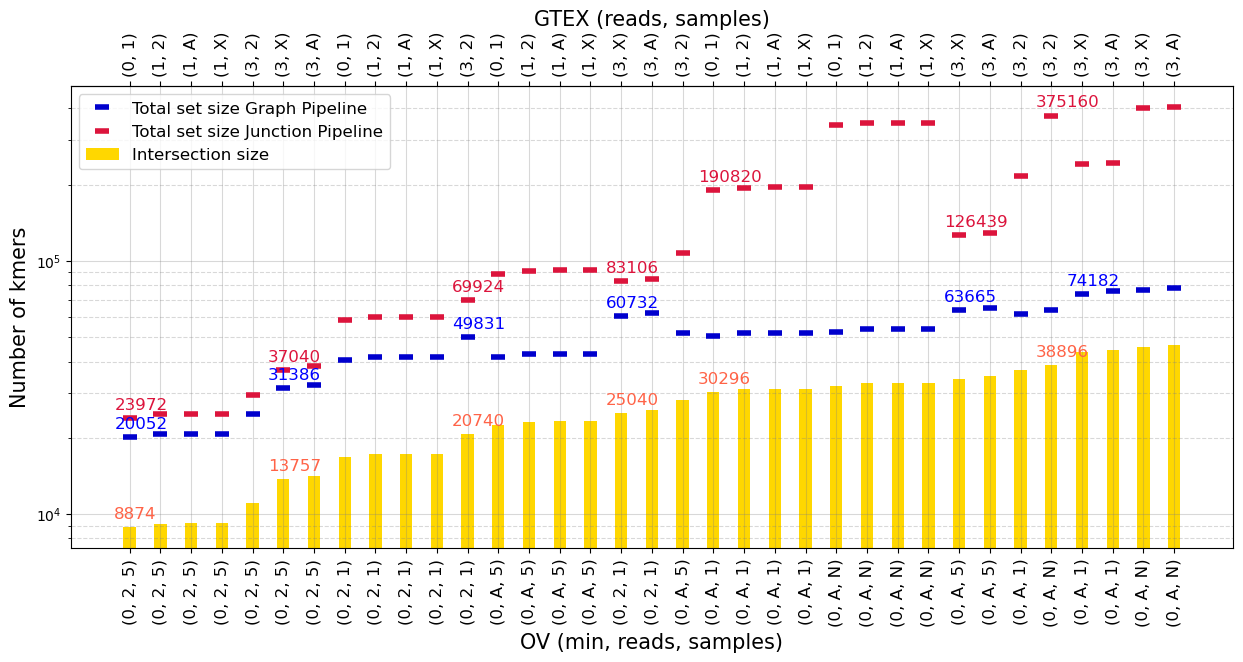

In [96]:
# Plot
text_font = {'size':'12', 'weight':'normal'}
ticks_fontsize = 12
axislabels_fontsize = 12
legend_fontsize = 12
axes_fontsize = 15

xaxis_label = 'GTEX (reads, samples)'
yaxis_label = f'{run_type.upper()} (min, reads, samples)'


colorgrid = 'grey'
alpha_grid = 0.3
marker_size = 10
mew = 4
color1 = 'gold'
color2 = 'crimson'
color4 = 'mediumblue'
colorgrid = 'grey'


fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 =  ax1.secondary_xaxis('top')   
#plt.figure(figsize=(15, 6), frameon=False, dpi=100)
plt.grid(b=True, axis = 'both', which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
plt.grid(b=False, axis = 'both', which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)
width = 0.4
plt.bar(df['index'], df['size_intersection'], width=width, 
        color=color1, label='Intersection size')
plt.plot(df['index'], df['size_eth'], alpha=1, color=color4,
         linestyle = 'None', markerfacecolor='None', marker="_", markersize=marker_size, markeredgewidth=mew,
         label = 'Total set size Graph Pipeline')
plt.plot(df['index'], df['size_ohsu'], alpha=1, color=color2,
         linestyle = 'None', markerfacecolor='None', marker="_", markersize=marker_size, markeredgewidth=mew,
         label = 'Total set size Junction Pipeline')

plot_text(df['size_ohsu'], df['size_ohsu'], 'top', color='crimson', font=text_font)
plot_text(df['size_eth'], df['size_eth'], 'top', color='blue', font=text_font)
plot_text(df['size_intersection'], df['size_intersection'], color='tomato', font=text_font)

plt.yscale('log')
max_scale = np.max([df['size_ohsu'].values, df['size_eth'].values])



ax1.set_xticks(np.arange(len(df['index'])), 
           labels = front_ticks,
           rotation = 90, 
           ha = 'center', 
           fontsize=ticks_fontsize)

ax2.set_xticks(np.arange(len(df['index'])), 
           labels = back_ticks,
           rotation = 90, 
           ha = 'center', 
           fontsize=ticks_fontsize)


plt.legend(fontsize=legend_fontsize)
plt.ylabel('Number of kmers', fontsize=axes_fontsize)
ax2.set_xlabel(xaxis_label, fontsize=axes_fontsize)
ax1.set_xlabel(yaxis_label, fontsize=axes_fontsize)



save = True
name = 'Barplot_ovelap'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
plt.show()

In [95]:
save_path

'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_19May_order_5ge_wAnnot_GPstar/plots/TCGA-25-1319-01A-01R-1565-13_Barplot_ovelap.pdf'

In [101]:
name = 'Barplot_sorting'
sorting_path = os.path.join(plot_dir, f'{base_plot}_{name}.tsv.gz')
print(f'Saving order to {sorting_path}')
df.to_csv(sorting_path, sep = '\t')

Saving order to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_19May_order_5ge_wAnnot_GPstar/plots/TCGA-25-1319-01A-01R-1565-13_Barplot_sorting.tsv.gz


# Plot Intersections

In [66]:
df.columns

Index(['sample', 'filter_', 'size_ohsu', 'size_eth', 'size_intersection',
       'size_ohsu\eth', 'size_eth\ohsu', 'filter_foreground_target',
       'filter_foreground_reads', 'filter_foreground_samples',
       'filter_background_reads', 'filter_background_samples', 'cohort',
       'motif', 'index', 'filter_background', 'filter_foreground'],
      dtype='object')

In [67]:
# Sort Valus for plot
df = df.sort_values(['size_eth', 
                     'filter_foreground_target',
                     'filter_foreground_reads', 
                     'filter_foreground_samples', 
                     'filter_background_reads', 
                     'filter_background_samples'
                    ], 
                   ascending=[False, False, False, False, False, False])
df['index'] = np.arange(len(df))

order_foreground = df['filter_foreground'].unique()
order_background = df['filter_background'].unique()


In [68]:
# Collect plot data
titles = ['Intersection size', 
'Total set size Graph Pipeline', 
'Total set size Junction Pipeline']
xaxis_label = 'GTEX (reads, samples)'
yaxis_label = f'{run_type.upper()} (min, reads, samples)'

df_plot = []
for f in ['size_intersection', 'size_eth', 'size_ohsu']: #, 'size_ohsu\eth', 'size_eth\ohsu']:
    # Extract the intersection
    df_inter = df.pivot(index = 'filter_foreground', columns = 'filter_background', values = f )
    # Enforce order
    df_inter = df_inter.loc[order_foreground, order_background]
    df_plot.append(df_inter)
    


In [69]:
xticks_font_size = 15
label_font_size = 15
tick_font_size = 12

/scratch/slurm-job.3924589/ipykernel_3236203/638118107.py:27: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(panelplot)
/scratch/slurm-job.3924589/ipykernel_3236203/638118107.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


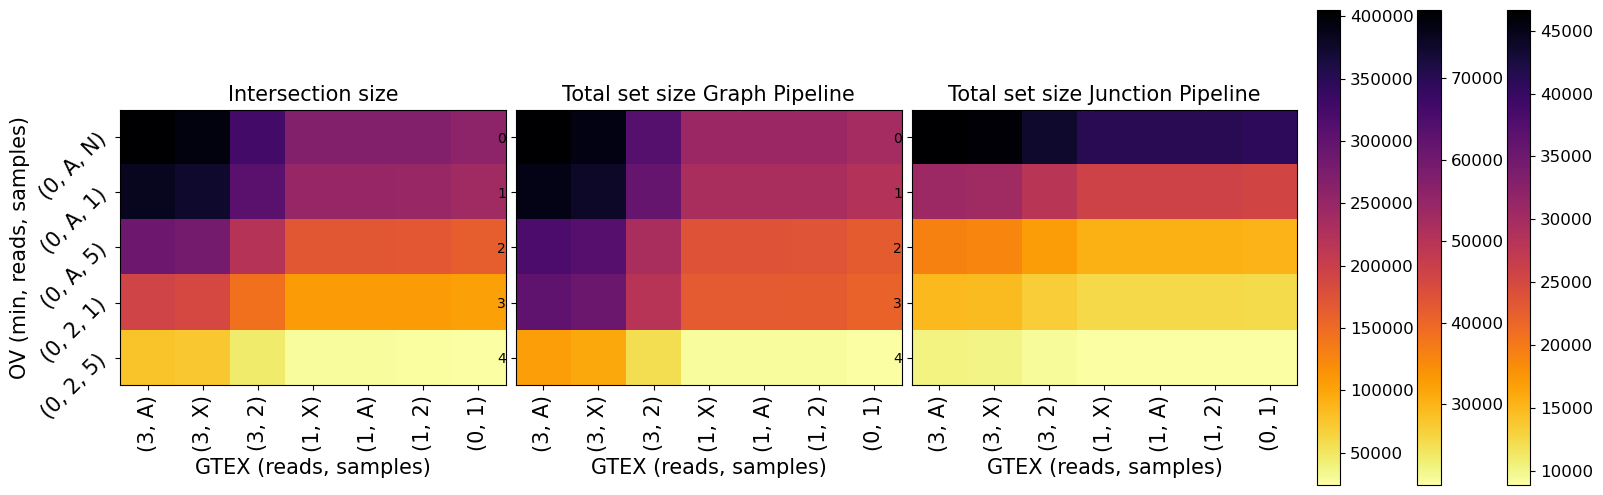

In [70]:
# Plot

nprow = 1
npcol = 3
fig = plt.figure(figsize=(15, 6), layout='constrained')
axes = [fig.add_subplot(nprow, npcol, i) for i in range(1,npcol+1)]

#vmin = max(1, np.min([df['size_eth'], df['size_ohsu']]))
#vmax = np.max([df['size_eth'], df['size_ohsu']]) #1e5
for pane_idx in np.arange(npcol):
    panelplot=axes[pane_idx].imshow(df_plot[pane_idx], origin='upper', 
                                    cmap='inferno_r') #norm=LogNorm(vmin=vmin, vmax=vmax))
    # x-axis 
    axes[pane_idx].set_title(titles[pane_idx], fontsize=label_font_size)
    axes[pane_idx].set_xlabel(xaxis_label, fontsize=label_font_size)
    axes[pane_idx].set_xticks(range(df_plot[pane_idx].shape[1]))
#    axes[pane_idx].set_xticklabels(prepare_backticks(df_plot[pane_idx].columns), rotation = 90 )
    axes[pane_idx].set_xticklabels(df_plot[pane_idx].columns, rotation = 90, fontsize=xticks_font_size)

    if pane_idx == 0 :
        # y-axis
        axes[pane_idx].set_ylabel(yaxis_label, fontsize=label_font_size)
        axes[pane_idx].set_yticks(range(df_plot[pane_idx].shape[0]))
#        axes[pane_idx].set_yticklabels(prepare_frontticks(df_plot[pane_idx].index), rotation = 45 )
        axes[pane_idx].set_yticklabels(df_plot[pane_idx].index, rotation = 45, fontsize=xticks_font_size)

    cbar = plt.colorbar(panelplot)
    cbar.ax.tick_params(labelsize=tick_font_size)

save = False
name = 'Matrix_ovelap_split'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_19May_order_5ge_wAnnot_GPstar/plots/TCGA-25-1319-01A-01R-1565-13_Matrix_ovelap.pdf


/scratch/slurm-job.3924589/ipykernel_3236203/2776359300.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


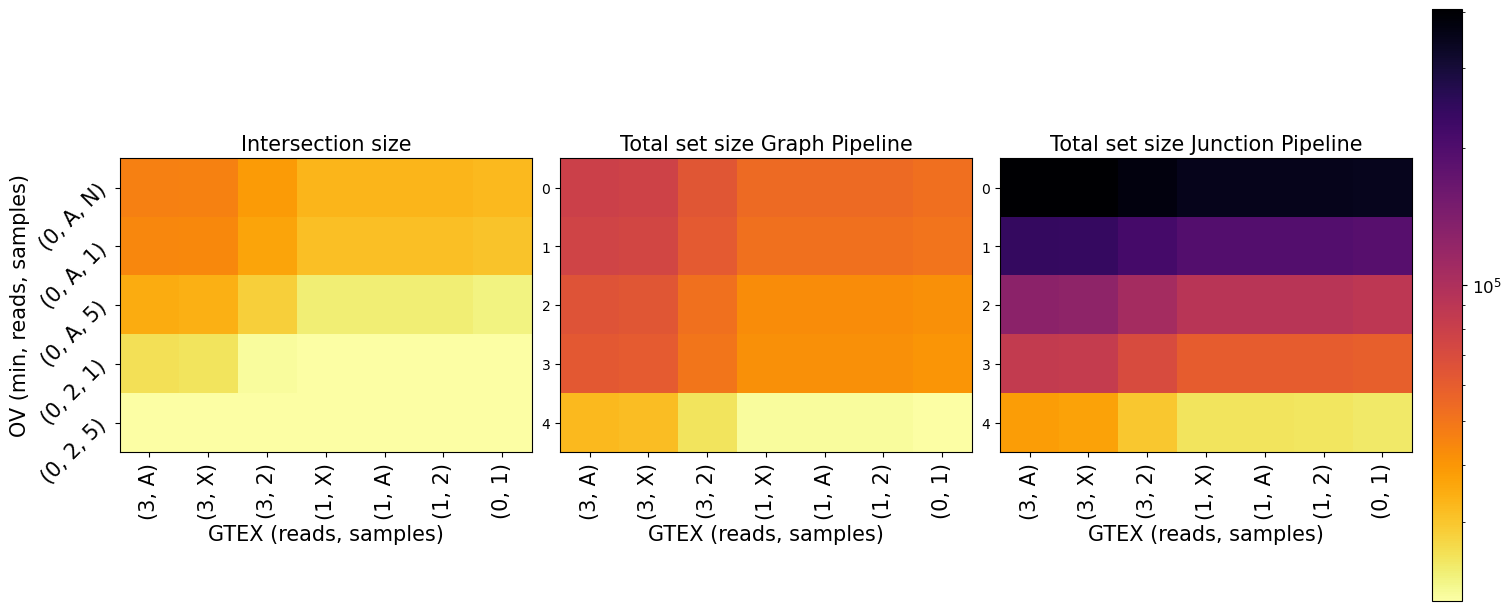

In [41]:
# Plot
nprow = 1
npcol = 3
fig = plt.figure(figsize=(15, 6), layout='constrained')
axes = [fig.add_subplot(nprow, npcol, i) for i in range(1,npcol+1)]

vmin = max(1, np.min([df['size_eth'], df['size_ohsu']]))
vmax = np.max([df['size_eth'], df['size_ohsu']]) #1e5
for pane_idx in np.arange(npcol):
    panelplot=axes[pane_idx].imshow(df_plot[pane_idx], origin='upper', 
                                    cmap='inferno_r', norm=LogNorm(vmin=vmin, vmax=vmax))
    # x-axis 
    axes[pane_idx].set_title(titles[pane_idx], fontsize=label_font_size)
    axes[pane_idx].set_xlabel(xaxis_label, fontsize=label_font_size)
    axes[pane_idx].set_xticks(range(df_plot[pane_idx].shape[1]))
#    axes[pane_idx].set_xticklabels(prepare_backticks(df_plot[pane_idx].columns), rotation = 90 )
    axes[pane_idx].set_xticklabels(df_plot[pane_idx].columns, rotation = 90, fontsize=xticks_font_size)

    if pane_idx == 0 :
        # y-axis
        axes[pane_idx].set_ylabel(yaxis_label, fontsize=label_font_size)
        axes[pane_idx].set_yticks(range(df_plot[pane_idx].shape[0]))
#        axes[pane_idx].set_yticklabels(prepare_frontticks(df_plot[pane_idx].index), rotation = 45 )
        axes[pane_idx].set_yticklabels(df_plot[pane_idx].index, rotation = 45, fontsize=xticks_font_size)
    
cbar = plt.colorbar(panelplot)
cbar.ax.tick_params(labelsize=tick_font_size)

save = True
name = 'Matrix_ovelap'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()


In [71]:
df_plot[2]

filter_background,"(3, A)","(3, X)","(3, 2)","(1, X)","(1, A)","(1, 2)","(0, 1)"
filter_foreground,,,,,,,
"(0, A, N)",405032,401860,375160,349426,349426,349007,344599
"(0, A, 1)",244234,241287,217323,195150,195150,194757,190820
"(0, A, 5)",128791,126439,107268,91641,91641,91308,88503
"(0, 2, 1)",84859,83106,69924,60253,60253,60035,58437
"(0, 2, 5)",38262,37040,29573,24913,24913,24766,23972


In [72]:
df_plot[1]

filter_background,"(3, A)","(3, X)","(3, 2)","(1, X)","(1, A)","(1, 2)","(0, 1)"
filter_foreground,,,,,,,
"(0, A, N)",78373,76534,63803,53930,53930,53822,52430
"(0, A, 1)",76015,74182,61615,51893,51893,51785,50400
"(0, A, 5)",65331,63665,51836,42924,42924,42823,41552
"(0, 2, 1)",62310,60732,49831,41695,41695,41612,40442
"(0, 2, 5)",32447,31386,24940,20683,20683,20638,20052
